In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [2]:
data = pd.read_csv('data_poly.csv')

In [3]:
data

,x,y
0,0,3
1,1,4
2,2,5
3,3,7
4,4,10
5,5,8
6,6,9
7,7,10
8,8,10
9,9,23


<AxesSubplot:xlabel='x', ylabel='y'>

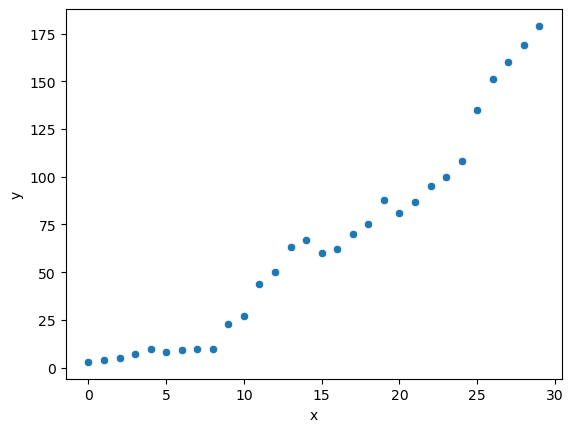

In [4]:
sns.scatterplot(x = 'x', y = 'y', data=data )

In [5]:
model = LinearRegression()
model.fit(data[['x']], data['y'])

LinearRegression()

In [6]:
data_pred = model.predict(data[['x']])

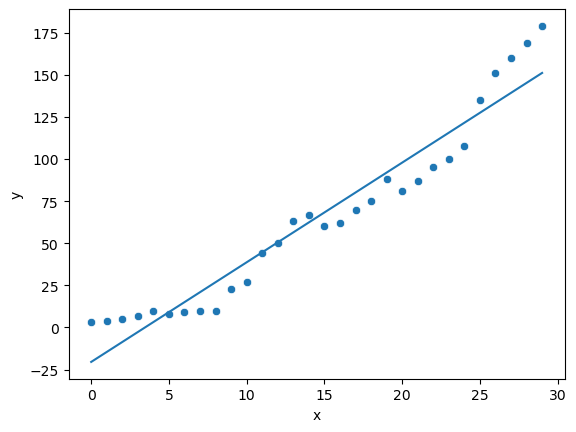

In [7]:
sns.scatterplot(x = 'x', y = 'y', data=data )
plt.plot(data_pred)

In [9]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_5 = PolynomialFeatures(degree=5, include_bias=False)
poly_15 = PolynomialFeatures(degree=15, include_bias=False)

In [10]:
poly_x = poly.fit_transform(data[['x']])
poly_x3 = poly_3.fit_transform(data[['x']])
poly_x5 = poly_5.fit_transform(data[['x']])
poly_x15 = poly_15.fit_transform(data[['x']])

In [11]:
model = LinearRegression()
model_3 = LinearRegression()
model_5 = LinearRegression()
model_15 = LinearRegression()



model_3.fit(poly_x3, data['y'])
model_5.fit(poly_x5, data['y'])
model_15.fit(poly_x15, data['y'])

LinearRegression()

In [12]:
data_pred_poly = model.predict(poly_x)

data_pred_poly_3 = model_3.predict(poly_x3)
data_pred_poly_5 = model_5.predict(poly_x5)
data_pred_poly_15 = model_15.predict(poly_x15)

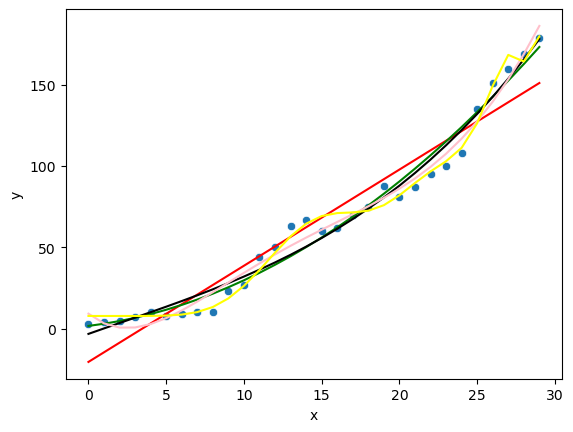

In [13]:
sns.scatterplot(x = 'x', y = 'y', data=data )
plt.plot(data_pred,color = 'red')
plt.plot(data_pred_poly, color = 'green')
plt.plot(data_pred_poly_3, color = 'black')
plt.plot(data_pred_poly_5, color = 'pink')
plt.plot(data_pred_poly_15, color = 'yellow')

In [14]:
print("MAPE of Straight Line = ",mean_absolute_percentage_error(data['y'],data_pred))
print("MAPE of Polynomial degree 2 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly))
print("MAPE of Polynomial degree 3 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly_3))
print("MAPE of Polynomial degree 5 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly_5))
print("MAPE of Polynomial degree 15 Line = ",mean_absolute_percentage_error(data['y'],data_pred_poly_15))

MAPE of Straight Line =  0.7996999195631865
MAPE of Polynomial degree 2 Line =  0.2031995437736923
MAPE of Polynomial degree 3 Line =  0.32043050951182656
MAPE of Polynomial degree 5 Line =  0.2942388626809141
MAPE of Polynomial degree 15 Line =  0.17432462595126647


In [17]:
(92 -85)/92

0.07608695652173914

In [18]:
(93-92)/93

0.010752688172043012

In [22]:
(87 -85)/87

0.022988505747126436

In [23]:
(90 -87)/90

0.03333333333333333

In [24]:
#train and test

In [131]:
data = data.sort_values(by = 'x')

In [161]:
train_X, test_X, train_y, test_y  = train_test_split(data[['x']],data['y'], test_size=0.35, random_state=10)


In [162]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((19, 1), (11, 1), (19,), (11,))

In [163]:
train = pd.concat([train_X,train_y], axis =1).sort_values(by = 'x')
test = pd.concat([test_X,test_y], axis =1).sort_values(by = 'x')

In [164]:
train

,x,y
0,0,3
4,4,10
6,6,9
8,8,10
9,9,23
10,10,27
11,11,44
14,14,67
15,15,60
16,16,62


<AxesSubplot:xlabel='x', ylabel='y'>

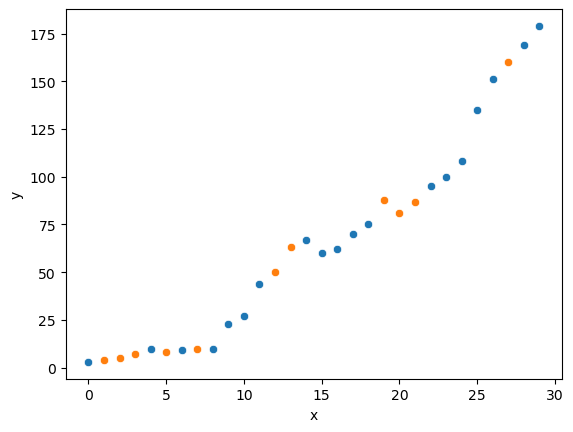

In [165]:
sns.scatterplot(x = train['x'], y = train['y'] )
sns.scatterplot(x = test['x'], y = test['y'] )

In [267]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_train_x = poly.fit_transform(train[['x']])
poly_test_x = poly.transform(test[['x']])

model = LinearRegression()

In [268]:
model.fit(poly_train_x, train['y'])

LinearRegression()

In [269]:
data_pred_poly_train = model.predict(poly_train_x)
data_pred_poly_test = model.predict(poly_test_x)


<AxesSubplot:xlabel='x', ylabel='y'>

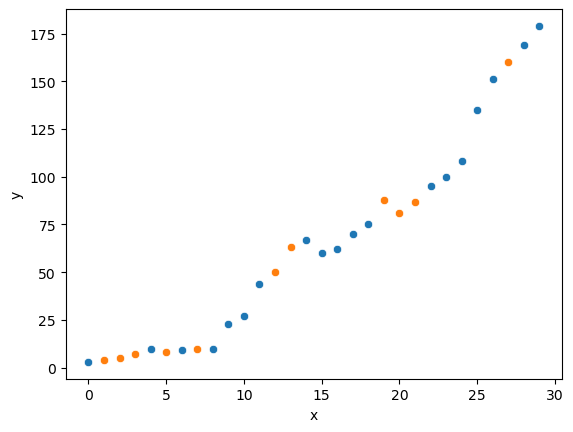

In [270]:
sns.scatterplot(x = train['x'], y = train['y'] )
sns.scatterplot(x = test['x'], y = test['y'] )

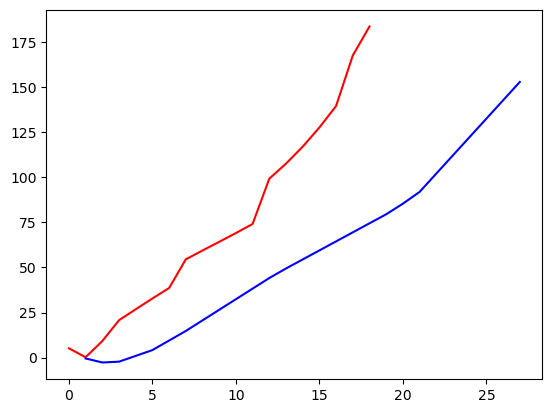

In [271]:

plt.plot(data_pred_poly_train, color = 'red')
plt.plot(test['x'],data_pred_poly_test, color = 'blue')


In [272]:
data_pred_poly_train

array([  5.16060701,   0.19064632,   9.12989878,  20.7151664 ,
        26.77689733,  32.76702261,  38.57167611,  54.49253826,
        59.38867947,  64.21010115,  69.07581502,  74.12406808,
        99.267406  , 107.58374305, 117.00280043, 127.64085107,
       139.58865431, 167.61542604, 183.69800255])

In [273]:
r2_train = mean_absolute_percentage_error(train['y'],data_pred_poly_train)
r2_test = mean_absolute_percentage_error(test['y'],data_pred_poly_test)

In [274]:
r2_train

0.20601578951706703

In [275]:
r2_test

0.5029649674228721

In [276]:
model.coef_

array([-7.62313954e+00,  2.12147024e+00, -1.48953356e-01,  4.53054896e-03,
       -4.66134701e-05])

<AxesSubplot:>

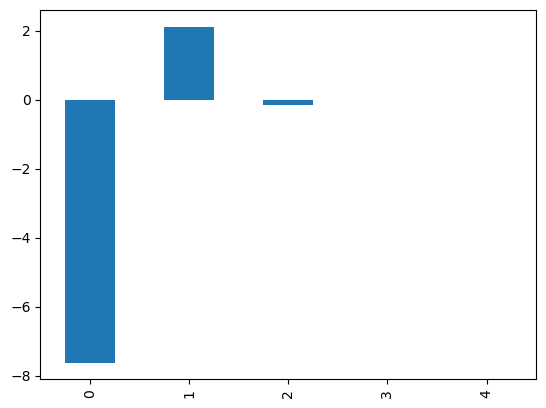

In [278]:
pd.Series(model.coef_).plot(kind = 'bar')

In [279]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [280]:
model = Ridge()

In [281]:
model.fit(poly_train_x, train['y'])

Ridge()

In [282]:
data_pred_poly_train = model.predict(poly_train_x)
data_pred_poly_test = model.predict(poly_test_x)


<AxesSubplot:xlabel='x', ylabel='y'>

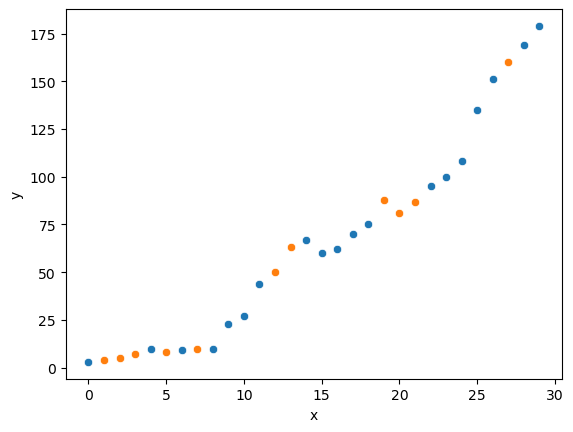

In [283]:
sns.scatterplot(x = train['x'], y = train['y'] )
sns.scatterplot(x = test['x'], y = test['y'] )

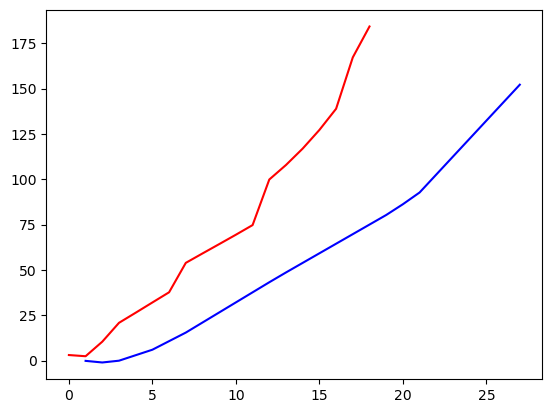

In [284]:

plt.plot(data_pred_poly_train, color = 'red')
plt.plot(test['x'],data_pred_poly_test, color = 'blue')


In [285]:
data_pred_poly_train

array([  3.08613079,   2.43080108,  10.45763154,  20.85145469,
        26.43267064,  32.08096071,  37.70027232,  53.92159228,
        59.11308065,  64.26292427,  69.44701663,  74.76236259,
        99.89453767, 107.90919726, 116.95973799, 127.23057406,
       138.90998236, 167.25400019, 184.29507227])

In [286]:
r2_train = mean_absolute_percentage_error(train['y'],data_pred_poly_train)
r2_test = mean_absolute_percentage_error(test['y'],data_pred_poly_test)

In [287]:
r2_train

0.16642074266866128

In [288]:
r2_test

0.4238795280252205

In [289]:
model.coef_

array([-4.53244044e+00,  1.40741128e+00, -8.77954650e-02,  2.31703084e-03,
       -1.79673731e-05])

<AxesSubplot:>

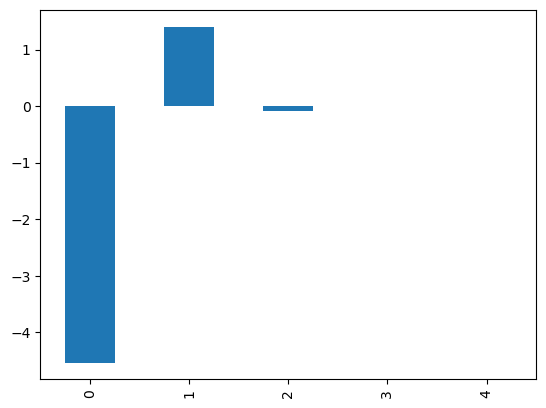

In [290]:
pd.Series(model.coef_).plot(kind = 'bar')

In [279]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [335]:
model = Lasso(alpha=1)

In [336]:
model.fit(poly_train_x, train['y'])

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.233e+02, tolerance: 5.554e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [337]:
data_pred_poly_train = model.predict(poly_train_x)
data_pred_poly_test = model.predict(poly_test_x)


<AxesSubplot:xlabel='x', ylabel='y'>

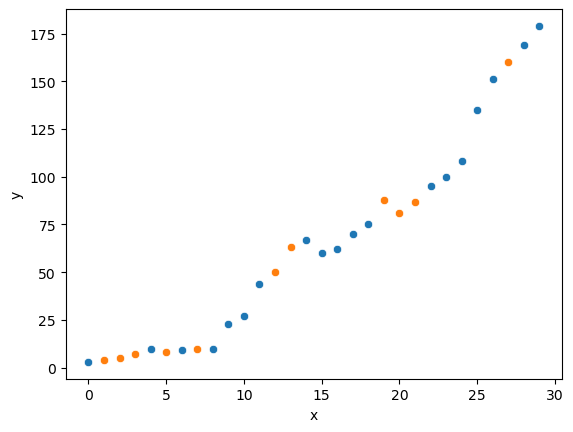

In [338]:
sns.scatterplot(x = train['x'], y = train['y'] )
sns.scatterplot(x = test['x'], y = test['y'] )

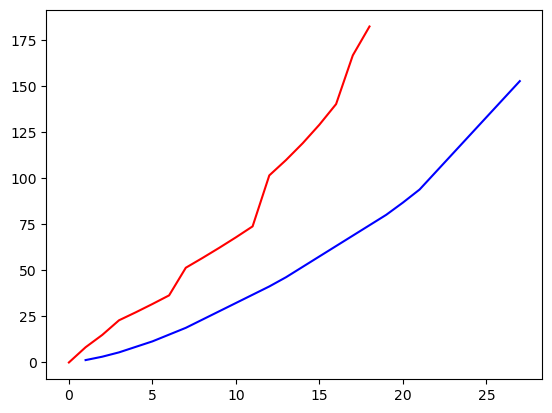

In [339]:

plt.plot(data_pred_poly_train, color = 'red')
plt.plot(test['x'],data_pred_poly_test, color = 'blue')


In [340]:
data_pred_poly_train

array([ -0.42977319,   7.85388945,  14.57167602,  22.50671575,
        26.83372808,  31.35894651,  36.05904122,  51.08688093,
        56.40736019,  61.9084283 ,  67.62108282,  73.58806721,
       101.30834132, 109.65306083, 118.79829661, 128.89054421,
       140.09419676, 166.58739058, 182.3021264 ])

In [341]:
r2_train = mean_absolute_percentage_error(train['y'],data_pred_poly_train)
r2_test = mean_absolute_percentage_error(test['y'],data_pred_poly_test)

In [342]:
r2_train

0.23689541503291264

In [343]:
r2_test

0.31563519065847695

In [344]:
model.coef_

array([ 1.00705806e+00,  3.01145920e-01, -8.80501305e-03, -2.32235357e-05,
        6.40795531e-06])

<AxesSubplot:>

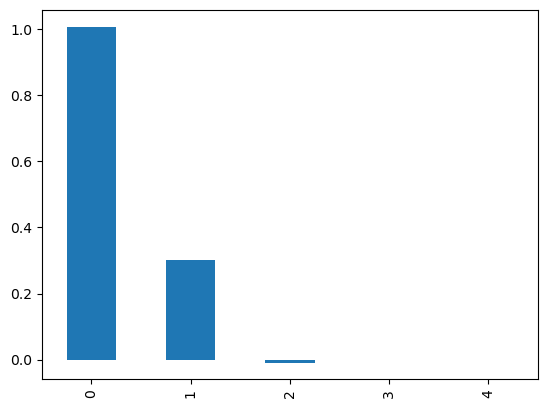

In [345]:
pd.Series(model.coef_).plot(kind = 'bar')

In [346]:
model = ElasticNet(alpha=10.0, l1_ratio=0.5)

In [347]:
model.fit(poly_train_x, train['y'])

/Users/mohamednoordeenalaudeen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.230e+02, tolerance: 5.554e+00
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=10.0)

In [348]:
data_pred_poly_train = model.predict(poly_train_x)
data_pred_poly_test = model.predict(poly_test_x)


<AxesSubplot:xlabel='x', ylabel='y'>

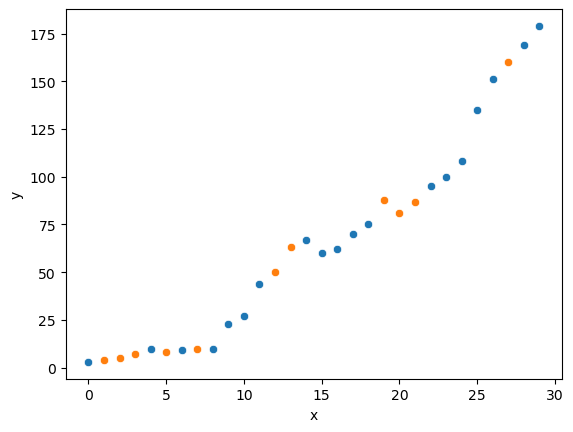

In [349]:
sns.scatterplot(x = train['x'], y = train['y'] )
sns.scatterplot(x = test['x'], y = test['y'] )

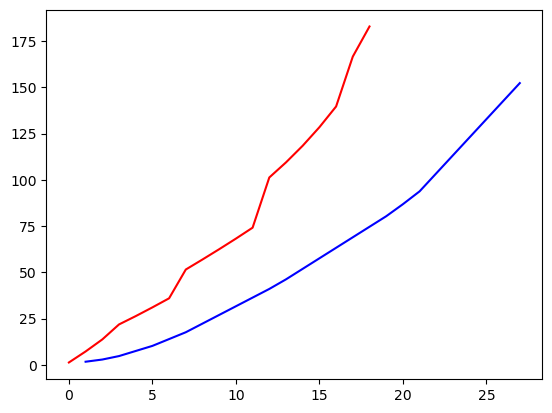

In [350]:

plt.plot(data_pred_poly_train, color = 'red')
plt.plot(test['x'],data_pred_poly_test, color = 'blue')


In [351]:
data_pred_poly_train

array([  1.24408943,   7.18902371,  13.69845367,  21.80294831,
        26.29958615,  31.02340523,  35.93243317,  51.49320644,
        56.91992681,  62.47822221,  68.1956455 ,  74.11485405,
       101.24761925, 109.41461355, 118.41280461, 128.41871754,
       139.63202085, 166.60121868, 182.88121085])

In [352]:
r2_train = mean_absolute_percentage_error(train['y'],data_pred_poly_train)
r2_test = mean_absolute_percentage_error(test['y'],data_pred_poly_test)

In [353]:
r2_train

0.19941491498242855

In [354]:
r2_test

0.28310774301820635

In [355]:
model.coef_

array([ 0.00000000e+00,  4.23802596e-01, -1.30328366e-02, -4.05487684e-05,
        8.37380506e-06])

<AxesSubplot:>

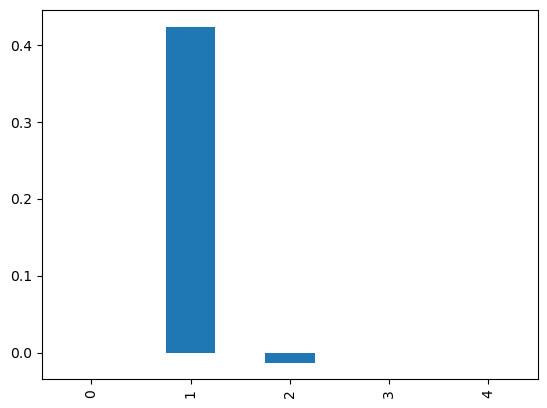

In [356]:
pd.Series(model.coef_).plot(kind = 'bar')

In [ ]:
model = Lasso(alpha=1)



model.fit(poly_train_x, train['y'])

data_pred_poly_train = model.predict(poly_train_x)
data_pred_poly_test = model.predict(poly_test_x)


sns.scatterplot(x = train['x'], y = train['y'] )
sns.scatterplot(x = test['x'], y = test['y'] )


plt.plot(data_pred_poly_train, color = 'red')
plt.plot(test['x'],data_pred_poly_test, color = 'blue')


data_pred_poly_train

r2_train = mean_absolute_percentage_error(train['y'],data_pred_poly_train)
r2_test = mean_absolute_percentage_error(test['y'],data_pred_poly_test)

r2_train

r2_test

model.coef_

pd.Series(model.coef_).plot(kind = 'bar')



In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly_train_x = poly.fit_transform(train[['x']])
poly_test_x = poly.transform(test[['x']])

model = LinearRegression()



model.fit(poly_train_x, train['y'])

data_pred_poly_train = model.predict(poly_train_x)
data_pred_poly_test = model.predict(poly_test_x)


sns.scatterplot(x = train['x'], y = train['y'] )
sns.scatterplot(x = test['x'], y = test['y'] )


plt.plot(data_pred_poly_train, color = 'red')
plt.plot(test['x'],data_pred_poly_test, color = 'blue')


data_pred_poly_train

r2_train = mean_absolute_percentage_error(train['y'],data_pred_poly_train)
r2_test = mean_absolute_percentage_error(test['y'],data_pred_poly_test)

r2_train

r2_test

model.coef_

pd.Series(model.coef_).plot(kind = 'bar')



In [39]:
def model_run(model, train_X, test_X, train_y, test_y):
    model.fit(train_X,train_y)
    train_pred = model.predict(train_X)
    test_pred = model.predict(test_X)
    r2_train = r2_score(train_y,train_pred)
    r2_test = r2_score(test_y,test_pred)
    return r2_train, r2_test

In [40]:
test_X.shape

(11, 1)

In [41]:
trainerr = []
testerr = []

for i in range(0,10):
    if i ==0:
        model = LinearRegression()
        mape_train, mape_test = model_run(model, train_X, test_X, train_y, test_y)
        trainerr.append(1-mape_train)
        testerr.append(1-mape_test)
        
        
    else:
        poly = PolynomialFeatures(degree=i, include_bias=False)
        poly_feature_train_x = poly.fit_transform(train_X)
        poly_feature_test_x = poly.transform(test_X)
        ploy_model = LinearRegression()
        error_train, error_test = model_run(ploy_model, poly_feature_train_x, poly_feature_test_x, train_y, test_y)
        trainerr.append(1-error_train)
        testerr.append(1-error_test)


In [31]:
trainerr

[0.051213134574498276,
 0.051213134574498276,
 0.011386977902735462,
 0.01090985442225223,
 0.008776381124455668,
 0.008509637007715898,
 0.004567371269360132,
 0.004215816041595377,
 0.002937429594913832,
 0.0017142263104424904]

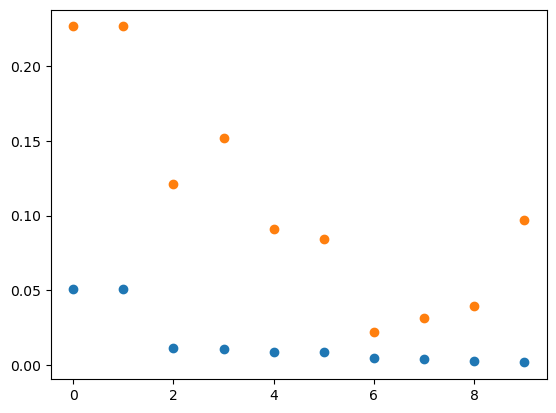

In [32]:
plt.scatter(x = range(0,10), y = trainerr)
plt.scatter(x = range(0,10), y = testerr)


In [125]:
model

LinearRegression()

In [126]:
model.intercept_

-21.630919501515642